## Base de dados Rain in Australia

A base de dados contém cerca de 10 anos de observações meteorológicas diárias de vários locais da Austrália. 

* Classe/rótulo: RainTomorrow (No/Yes)
* Total: 142.193 registros
* Classe negativa/No: 110.316 registros
* Classe positiva/Yes: 31.877 registros

### Objetivo: Prever a chuva do dia seguinte treinando modelos de classificação na variável alvo RainTomorrow (Chove_Amanha).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
seed_number = 123

### Carregar base de dados

In [2]:
# dataset de teste
test = pd.read_csv('input/test.csv')
test.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,5,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2,7,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
3,19,2008-12-19,Albury,11.2,22.5,10.6,NaN,NaN,SSE,43.0,...,47.0,32.0,1009.4,1009.7,NaN,2.0,15.5,21.0,Yes,No
4,25,2008-12-25,Albury,12.6,32.4,0.0,NaN,NaN,W,43.0,...,49.0,17.0,1012.9,1010.1,NaN,NaN,21.5,31.2,No,No


In [3]:
# dataset de treino
train = pd.read_csv('input/train.csv')
train.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
1,3,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2,4,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
3,6,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
4,8,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No


In [4]:
# shape test e treino
print("Shape teste:{} e treino:{}".format(test.shape,train.shape))

Shape teste:(28439, 24) e treino:(113754, 24)


In [5]:
# colocar a coluna id como index 
test.set_index('Id', inplace=True)
train.set_index('Id', inplace=True)

### Junção das bases de treino e teste

In [6]:
data = pd.concat([test,train],sort=True)
data.head()

,Cloud3pm,Cloud9am,Date,Evaporation,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,...,Rainfall,Sunshine,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,8.0,2008-12-01,NaN,22.0,71.0,Albury,22.9,13.4,1007.1,...,0.6,NaN,21.8,16.9,WNW,W,W,44.0,24.0,20.0
5,8.0,7.0,2008-12-05,NaN,33.0,82.0,Albury,32.3,17.5,1006.0,...,1.0,NaN,29.7,17.8,NW,ENE,W,41.0,20.0,7.0
7,NaN,1.0,2008-12-07,NaN,19.0,49.0,Albury,25.0,14.3,1008.2,...,0.0,NaN,24.6,18.1,W,SW,W,50.0,24.0,20.0
19,2.0,NaN,2008-12-19,NaN,32.0,47.0,Albury,22.5,11.2,1009.7,...,10.6,NaN,21.0,15.5,SW,WSW,SSE,43.0,17.0,24.0
25,NaN,NaN,2008-12-25,NaN,17.0,49.0,Albury,32.4,12.6,1010.1,...,0.0,NaN,31.2,21.5,W,E,W,43.0,19.0,4.0


In [7]:
# definindo a coluna id como index
data.sort_index(inplace=True)
data.head()

,Cloud3pm,Cloud9am,Date,Evaporation,Humidity3pm,Humidity9am,Location,MaxTemp,MinTemp,Pressure3pm,...,Rainfall,Sunshine,Temp3pm,Temp9am,WindDir3pm,WindDir9am,WindGustDir,WindGustSpeed,WindSpeed3pm,WindSpeed9am
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,8.0,2008-12-01,NaN,22.0,71.0,Albury,22.9,13.4,1007.1,...,0.6,NaN,21.8,16.9,WNW,W,W,44.0,24.0,20.0
2,NaN,NaN,2008-12-02,NaN,25.0,44.0,Albury,25.1,7.4,1007.8,...,0.0,NaN,24.3,17.2,WSW,NNW,WNW,44.0,22.0,4.0
3,2.0,NaN,2008-12-03,NaN,30.0,38.0,Albury,25.7,12.9,1008.7,...,0.0,NaN,23.2,21.0,WSW,W,WSW,46.0,26.0,19.0
4,NaN,NaN,2008-12-04,NaN,16.0,45.0,Albury,28.0,9.2,1012.8,...,0.0,NaN,26.5,18.1,E,SE,NE,24.0,9.0,11.0
5,8.0,7.0,2008-12-05,NaN,33.0,82.0,Albury,32.3,17.5,1006.0,...,1.0,NaN,29.7,17.8,NW,ENE,W,41.0,20.0,7.0


In [8]:
# shape 
data.shape

(142193, 23)

In [9]:
# Renomear as colunas

data.columns = [
    'Nuvem_3_Tarde','Nuvem_9_Manha','Data','Evaporacao','Umidade_3_Tarde','Umidade_9_Manha','Localizacao','Temperatura_Maxima',
    'Temperatura_Minima','Pressao_3_Tarde','Pressao_9_Manha','Chove_Hoje','Chove_Amanha','Pluviosidade','Brilho_Do_Sol',
    'Temperatura_3_Tarde','Temperatura_9_Manha','Direcao_Vento_3_Tarde','Direcao_Vento_9_Manha','Direcao_Rajada_Vento',
    'Velocidade_Rajada_Vento', 'Velocidade_Vento_3_Tarde', 'Velocidade_Vento_9_Manha'
]
data.head()

,Nuvem_3_Tarde,Nuvem_9_Manha,Data,Evaporacao,Umidade_3_Tarde,Umidade_9_Manha,Localizacao,Temperatura_Maxima,Temperatura_Minima,Pressao_3_Tarde,...,Pluviosidade,Brilho_Do_Sol,Temperatura_3_Tarde,Temperatura_9_Manha,Direcao_Vento_3_Tarde,Direcao_Vento_9_Manha,Direcao_Rajada_Vento,Velocidade_Rajada_Vento,Velocidade_Vento_3_Tarde,Velocidade_Vento_9_Manha
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,8.0,2008-12-01,NaN,22.0,71.0,Albury,22.9,13.4,1007.1,...,0.6,NaN,21.8,16.9,WNW,W,W,44.0,24.0,20.0
2,NaN,NaN,2008-12-02,NaN,25.0,44.0,Albury,25.1,7.4,1007.8,...,0.0,NaN,24.3,17.2,WSW,NNW,WNW,44.0,22.0,4.0
3,2.0,NaN,2008-12-03,NaN,30.0,38.0,Albury,25.7,12.9,1008.7,...,0.0,NaN,23.2,21.0,WSW,W,WSW,46.0,26.0,19.0
4,NaN,NaN,2008-12-04,NaN,16.0,45.0,Albury,28.0,9.2,1012.8,...,0.0,NaN,26.5,18.1,E,SE,NE,24.0,9.0,11.0
5,8.0,7.0,2008-12-05,NaN,33.0,82.0,Albury,32.3,17.5,1006.0,...,1.0,NaN,29.7,17.8,NW,ENE,W,41.0,20.0,7.0


### Endendendo o dataset 

In [10]:
data.dtypes

Nuvem_3_Tarde               float64
Nuvem_9_Manha               float64
Data                         object
Evaporacao                  float64
Umidade_3_Tarde             float64
Umidade_9_Manha             float64
Localizacao                  object
Temperatura_Maxima          float64
Temperatura_Minima          float64
Pressao_3_Tarde             float64
Pressao_9_Manha             float64
Chove_Hoje                   object
Chove_Amanha                 object
Pluviosidade                float64
Brilho_Do_Sol               float64
Temperatura_3_Tarde         float64
Temperatura_9_Manha         float64
Direcao_Vento_3_Tarde        object
Direcao_Vento_9_Manha        object
Direcao_Rajada_Vento         object
Velocidade_Rajada_Vento     float64
Velocidade_Vento_3_Tarde    float64
Velocidade_Vento_9_Manha    float64
dtype: object

In [11]:
data.describe()
# variáveis continuas

,Nuvem_3_Tarde,Nuvem_9_Manha,Evaporacao,Umidade_3_Tarde,Umidade_9_Manha,Temperatura_Maxima,Temperatura_Minima,Pressao_3_Tarde,Pressao_9_Manha,Pluviosidade,Brilho_Do_Sol,Temperatura_3_Tarde,Temperatura_9_Manha,Velocidade_Rajada_Vento,Velocidade_Vento_3_Tarde,Velocidade_Vento_9_Manha
count,85099.000000,88536.000000,81350.000000,138583.000000,140419.000000,141871.000000,141556.000000,128212.000000,128179.000000,140787.000000,74377.000000,139467.000000,141289.000000,132923.000000,139563.000000,140845.000000
mean,4.503167,4.437189,5.469824,51.482606,68.843810,23.226784,12.186400,1015.258204,1017.653758,2.349974,7.624853,21.687235,16.987509,39.984292,18.637576,14.001988
std,2.720633,2.887016,4.188537,20.797772,19.051293,7.117618,6.403283,7.036677,7.105476,8.465173,3.781525,6.937594,6.492838,13.588801,8.803345,8.893337
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.800000,-8.500000,977.100000,980.500000,0.000000,0.000000,-5.400000,-7.200000,6.000000,0.000000,0.000000
25%,2.000000,1.000000,2.600000,37.000000,57.000000,17.900000,7.600000,1010.400000,1012.900000,0.000000,4.900000,16.600000,12.300000,31.000000,13.000000,7.000000
50%,5.000000,5.000000,4.800000,52.000000,70.000000,22.600000,12.000000,1015.200000,1017.600000,0.000000,8.500000,21.100000,16.700000,39.000000,19.000000,13.000000
75%,7.000000,7.000000,7.400000,66.000000,83.000000,28.200000,16.800000,1020.000000,1022.400000,0.800000,10.600000,26.400000,21.600000,48.000000,24.000000,19.000000
max,9.000000,9.000000,145.000000,100.000000,100.000000,48.100000,33.900000,1039.600000,1041.000000,371.000000,14.500000,46.700000,40.200000,135.000000,87.000000,130.000000


In [12]:
data.describe(include=['O'])
# variáveis categóricas 

,Data,Localizacao,Chove_Hoje,Chove_Amanha,Direcao_Vento_3_Tarde,Direcao_Vento_9_Manha,Direcao_Rajada_Vento
count,142193,142193,140787,142193,138415,132180,132863
unique,3436,49,2,2,16,16,16
top,2013-12-01,Canberra,No,No,SE,N,W
freq,49,3418,109332,110316,10663,11393,9780


<AxesSubplot:xlabel='Chove_Amanha', ylabel='Probability'>

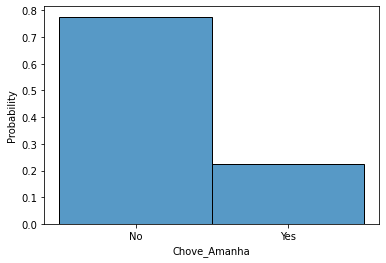

In [13]:
# Verificação do balanceamento da base
sns.histplot(data, x="Chove_Amanha", stat="probability")

In [14]:
# Frequencia absoluta de yes e no 
print(data['Chove_Amanha'].value_counts())
# total de dados da coluna Chove_Amanha
print(data['Chove_Amanha'].count()) 
# frequência relativa (absoluta/total)
print(data['Chove_Amanha'].value_counts()/data['Chove_Amanha'].count())

No     110316
Yes     31877
Name: Chove_Amanha, dtype: int64
142193
No     0.775819
Yes    0.224181
Name: Chove_Amanha, dtype: float64


In [15]:
# A base está desbalanceada com mais casos de dias que não choveu.

### Preparação dos dados

### Redução

In [16]:
data.drop(['Data', 'Localizacao','Direcao_Vento_3_Tarde','Direcao_Vento_9_Manha','Direcao_Rajada_Vento'], axis=1, inplace=True)

In [17]:
data.shape

(142193, 18)

### Limpeza

In [18]:
# verificação de valores faltosos

num = data.isnull().sum()
num

Nuvem_3_Tarde               57094
Nuvem_9_Manha               53657
Evaporacao                  60843
Umidade_3_Tarde              3610
Umidade_9_Manha              1774
Temperatura_Maxima            322
Temperatura_Minima            637
Pressao_3_Tarde             13981
Pressao_9_Manha             14014
Chove_Hoje                   1406
Chove_Amanha                    0
Pluviosidade                 1406
Brilho_Do_Sol               67816
Temperatura_3_Tarde          2726
Temperatura_9_Manha           904
Velocidade_Rajada_Vento      9270
Velocidade_Vento_3_Tarde     2630
Velocidade_Vento_9_Manha     1348
dtype: int64

In [19]:
# Preenchimento de valores Faltosos

data['Nuvem_3_Tarde'].fillna(data['Nuvem_3_Tarde'].median(), inplace=True)
data['Nuvem_9_Manha'].fillna(data['Nuvem_9_Manha'].median(), inplace=True)
data['Evaporacao'].fillna(data['Evaporacao'].mean(), inplace=True)
data['Umidade_3_Tarde'].fillna(data['Umidade_3_Tarde'].median(), inplace=True)
data['Umidade_9_Manha'].fillna(data['Umidade_9_Manha'].median(), inplace=True)
data['Temperatura_Maxima'].fillna(data['Temperatura_Maxima'].mean(), inplace=True)
data['Temperatura_Minima'].fillna(data['Temperatura_Minima'].mean(), inplace=True)
data['Pressao_3_Tarde'].fillna(data['Pressao_3_Tarde'].mean(), inplace=True)
data['Pressao_9_Manha'].fillna(data['Pressao_9_Manha'].mean(), inplace=True)
data['Chove_Hoje'].fillna(data['Chove_Hoje'].mode()[0], inplace=True)
data['Pluviosidade'].fillna(data['Pluviosidade'].mean(), inplace=True)
data['Brilho_Do_Sol'].fillna(data['Brilho_Do_Sol'].mean(), inplace=True)
data['Temperatura_3_Tarde'].fillna(data['Temperatura_3_Tarde'].mean(), inplace=True)
data['Temperatura_9_Manha'].fillna(data['Temperatura_9_Manha'].mean(), inplace=True)
data['Velocidade_Rajada_Vento'].fillna(data['Velocidade_Rajada_Vento'].median(), inplace=True)
data['Velocidade_Vento_3_Tarde'].fillna(data['Velocidade_Vento_3_Tarde'].median(), inplace=True)
data['Velocidade_Vento_9_Manha'].fillna(data['Velocidade_Vento_9_Manha'].median(), inplace=True)

data.head()

,Nuvem_3_Tarde,Nuvem_9_Manha,Evaporacao,Umidade_3_Tarde,Umidade_9_Manha,Temperatura_Maxima,Temperatura_Minima,Pressao_3_Tarde,Pressao_9_Manha,Chove_Hoje,Chove_Amanha,Pluviosidade,Brilho_Do_Sol,Temperatura_3_Tarde,Temperatura_9_Manha,Velocidade_Rajada_Vento,Velocidade_Vento_3_Tarde,Velocidade_Vento_9_Manha
Id,,,,,,,,,,,,,,,,,,
1,5.0,8.0,5.469824,22.0,71.0,22.9,13.4,1007.1,1007.7,No,No,0.6,7.624853,21.8,16.9,44.0,24.0,20.0
2,5.0,5.0,5.469824,25.0,44.0,25.1,7.4,1007.8,1010.6,No,No,0.0,7.624853,24.3,17.2,44.0,22.0,4.0
3,2.0,5.0,5.469824,30.0,38.0,25.7,12.9,1008.7,1007.6,No,No,0.0,7.624853,23.2,21.0,46.0,26.0,19.0
4,5.0,5.0,5.469824,16.0,45.0,28.0,9.2,1012.8,1017.6,No,No,0.0,7.624853,26.5,18.1,24.0,9.0,11.0
5,8.0,7.0,5.469824,33.0,82.0,32.3,17.5,1006.0,1010.8,No,No,1.0,7.624853,29.7,17.8,41.0,20.0,7.0


In [20]:
# modificando os atributos 'Chove_Hoje' e 'Chove_Amanha' 

data.loc[data['Chove_Hoje'] == 'No', 'Chove_Hoje'] = 0
data.loc[data['Chove_Hoje'] == 'Yes', 'Chove_Hoje'] = 1

data.loc[data['Chove_Amanha'] == 'No', 'Chove_Amanha'] = 0
data.loc[data['Chove_Amanha'] == 'Yes', 'Chove_Amanha'] = 1

In [21]:
data['Chove_Hoje'] = np.float64(data['Chove_Hoje']) 
data['Chove_Amanha'] = np.float64(data['Chove_Amanha']) 

In [22]:
data.dtypes

Nuvem_3_Tarde               float64
Nuvem_9_Manha               float64
Evaporacao                  float64
Umidade_3_Tarde             float64
Umidade_9_Manha             float64
Temperatura_Maxima          float64
Temperatura_Minima          float64
Pressao_3_Tarde             float64
Pressao_9_Manha             float64
Chove_Hoje                  float64
Chove_Amanha                float64
Pluviosidade                float64
Brilho_Do_Sol               float64
Temperatura_3_Tarde         float64
Temperatura_9_Manha         float64
Velocidade_Rajada_Vento     float64
Velocidade_Vento_3_Tarde    float64
Velocidade_Vento_9_Manha    float64
dtype: object

### Divisão de treino-teste e normalização dos atributos

#### Sem realizar o balanceamento da base

In [23]:
# Separando os dados do teste (submissão)
test = data.loc[test.index]
test.drop('Chove_Amanha', axis=1, inplace=True)


# Separando os dados para treino e validação dos modelos
data = data.loc[train.index]

data.shape, test.shape

((113754, 18), (28439, 17))

In [24]:
data.head()

,Nuvem_3_Tarde,Nuvem_9_Manha,Evaporacao,Umidade_3_Tarde,Umidade_9_Manha,Temperatura_Maxima,Temperatura_Minima,Pressao_3_Tarde,Pressao_9_Manha,Chove_Hoje,Chove_Amanha,Pluviosidade,Brilho_Do_Sol,Temperatura_3_Tarde,Temperatura_9_Manha,Velocidade_Rajada_Vento,Velocidade_Vento_3_Tarde,Velocidade_Vento_9_Manha
Id,,,,,,,,,,,,,,,,,,
2,5.0,5.0,5.469824,25.0,44.0,25.1,7.4,1007.8,1010.6,0.0,0.0,0.0,7.624853,24.3,17.2,44.0,22.0,4.0
3,2.0,5.0,5.469824,30.0,38.0,25.7,12.9,1008.7,1007.6,0.0,0.0,0.0,7.624853,23.2,21.0,46.0,26.0,19.0
4,5.0,5.0,5.469824,16.0,45.0,28.0,9.2,1012.8,1017.6,0.0,0.0,0.0,7.624853,26.5,18.1,24.0,9.0,11.0
6,5.0,5.0,5.469824,23.0,55.0,29.7,14.6,1005.4,1009.2,0.0,0.0,0.2,7.624853,28.9,20.6,56.0,24.0,19.0
8,5.0,5.0,5.469824,19.0,48.0,26.7,7.7,1010.1,1013.4,0.0,0.0,0.0,7.624853,25.5,16.3,35.0,17.0,6.0


In [25]:
# Dividindo dados em variáveis X e y

# input
X = data.drop('Chove_Amanha', axis=1)
# valor a ser previsto
y = data['Chove_Amanha']

X.shape, y.shape

((113754, 17), (113754,))

### Separação em treino e validação com Houdout

In [26]:
from sklearn.model_selection import train_test_split
# separação do dataset de treino em treino e validação
np.random.seed(seed_number)
# Divisão Holdout 70% treino / 30% teste com estratificação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = seed_number)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((79627, 17), (34127, 17), (79627,), (34127,))

#### Normalização 

In [27]:

from sklearn.preprocessing import MinMaxScaler

features_list = X_train.columns.to_list()

scaler = MinMaxScaler(copy=False)

scaler.fit_transform(X_train[features_list])
scaler.transform(X_valid[features_list])
X_train.head()

,Nuvem_3_Tarde,Nuvem_9_Manha,Evaporacao,Umidade_3_Tarde,Umidade_9_Manha,Temperatura_Maxima,Temperatura_Minima,Pressao_3_Tarde,Pressao_9_Manha,Chove_Hoje,Pluviosidade,Brilho_Do_Sol,Temperatura_3_Tarde,Temperatura_9_Manha,Velocidade_Rajada_Vento,Velocidade_Vento_3_Tarde,Velocidade_Vento_9_Manha
Id,,,,,,,,,,,,,,,,,
83007,5.0,5.0,6.600000,48.0,85.0,21.0,8.8,1010.6,1013.2,0.0,0.0,10.300000,20.2,14.4,46.0,30.0,15.0
28451,5.0,5.0,5.469824,24.0,33.0,19.6,7.7,1015.5,1014.8,0.0,0.0,7.624853,18.1,16.2,50.0,24.0,15.0
78052,7.0,1.0,10.000000,58.0,56.0,17.5,12.5,1012.0,1012.5,1.0,10.0,4.400000,15.8,14.1,57.0,20.0,17.0
9451,6.0,6.0,4.200000,78.0,78.0,29.5,21.4,1008.8,1011.6,0.0,0.8,5.800000,25.3,25.3,28.0,13.0,15.0
78337,2.0,6.0,4.600000,49.0,60.0,22.1,13.3,1021.4,1022.6,0.0,0.0,11.300000,21.2,16.0,37.0,15.0,9.0


### Treinamento

#### Balanceamento

In [64]:
# Usando Class Weight
no_rain = np.size(np.where(y_train == 0))
rain = np.size(np.where(y_train == 1))
ratio = no_rain / rain
np.int64(ratio) 

3

In [78]:
from sklearn import svm

class_weight={0:1, 1:3}

model = svm.SVC(class_weight=class_weight)

model.fit(X_train, y_train)

# gerar predicao
y_pred = model.predict(X_valid)

#### Algoritmo XGBoost para treinamento

In [75]:
# import xgboost as xgb

# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# #treinar modelo
# model.fit(X_train, y_train)
# # gerar predicao
# y_pred = model.predict(X_valid)



### Cálculo  das métricas para avaliar o resultado

In [79]:
from sklearn.metrics import (recall_score, accuracy_score, precision_score, f1_score, roc_auc_score)

def show_metrics(model, X_valid, y_valid,y_pred):
    metrics = {
        'recall': recall_score(y_valid,y_pred),
        'accuracy': accuracy_score(y_valid,y_pred),
        'precision': precision_score(y_valid,y_pred),
        'F1': f1_score(y_valid,y_pred),
        #'roc_auc': roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    }
    print(pd.DataFrame.from_dict(metrics, orient='index',columns=['Metrics']))

show_metrics(model, X_valid, y_valid, y_pred)

            Metrics
recall     0.706705
accuracy   0.802268
precision  0.545555
F1         0.615761


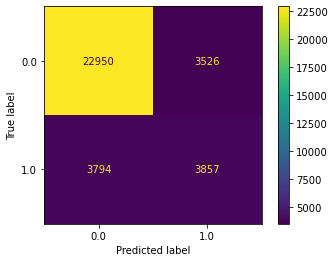

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_valid, y_valid)  
plt.show()

##### Temos que 
* Previu que não vai chover 25.070 vezes corretamente
* Previu que vai chover 3987 vezes corretamente
* Previu que não vai chover 1406 vezes incorretamente
* Previu que vai chover 3664 vezes incorretamente

In [31]:
no_rain = y_valid[y_valid == 0].count()
rain = y_valid[y_valid == 1].count()
print("Total para vai chover:{}\nTotal para não vai chover:{}" .format(rain,no_rain))


Total para vai chover:7651
Total para não vai chover:26476
